In [2]:
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /private/var/folders/73/dfnlcqg57w7btn76pt1r17cm0000gp/T/pip-install-2w_edj14/twint_55712d9cf44f45fbb9a39d9d5124aa3d
  Running command git clone -q https://github.com/twintproject/twint.git /private/var/folders/73/dfnlcqg57w7btn76pt1r17cm0000gp/T/pip-install-2w_edj14/twint_55712d9cf44f45fbb9a39d9d5124aa3d
  Running command git checkout -q origin/master
  Resolved https://github.com/twintproject/twint.git to commit origin/master


In [3]:
import pandas as pd
import twint
import re
import requests
import nest_asyncio
from textblob import TextBlob
nest_asyncio.apply()
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
candidate_name={'Peter Obi':'Obidients',
    'Bola Ahmed Tinubu':'BAT',
    'Atiku Abubakar':'Atiku'}

In [5]:
def twintConfig(search_string):
    c = twint.Config()
    c.Search = search_string[1]
    c.Limit=500
    c.Lang = 'en'
    c.Pandas = True
    c.Pandas_au = True          
    c.Pandas_clean=True
    c.Since='2022-01-01'
    c.Until='2022-12-31'
    twint.run.Search(c)

In [6]:
def Run_Twint(search_vals):
    
    #set empty dataframe for join
    out_df= pd.DataFrame()
    
    for candidate in search_vals.items():
        print ("running for search item: "+candidate[0]+"\n")
        print ("Search string: "+candidate[1]+"\n")
        
        #run twint
        twintConfig(candidate)
        
        #get dataframe
        df_all = twint.storage.panda.Tweets_df
        
        #join Dataframes and create 'Bank' column
        df_all["Candidate"]= candidate[0]
        out_df = pd.concat([out_df,df_all])
        
    return out_df

In [7]:
df_all = Run_Twint(candidate_name)

running for search item: Peter Obi

Search string: Obidients

1608975926729273345 2022-12-31 00:58:48 +0100 <Nairaexchanger> @channelstv What Okowa is not telling them is tthqt his election is not like when they can manually enter figures. This is the first election in Nigeria where actual votes will count. Okowa will not win Delta for PDP. There will be great shock across the land. Obidients keep grinding💪💪💪.
1608975401870848001 2022-12-31 00:56:43 +0100 <akduality> @zarguaruwa @Topboychriss Beware of obidients. They are always hostile but hostility don't win election
1608974899619725314 2022-12-31 00:54:44 +0100 <Dr_chazduke> @JosephOnuorah Oh, My family is fond of the song. Thank you Big Joe for bringing it back. Obidients have come a long way 🙌🏼🫶🏽
1608974476598714376 2022-12-31 00:53:03 +0100 <JosephOnuorah> May 21st Obidient #1MillionMarchForPeterObi Rally  Ikeja 📍 Lagos Nigeria   Some Major Obidients towards the end of the clip 😂  https://t.co/SMMFCONDSf
1608974433674473472 2022-

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
running for search item: Atiku Abubakar

Search string: Atiku

1608976028030087170 2022-12-31 00:59:13 +0100 <Gagarute> @channelstv But the mob without head are saying Atiku asked Obasanjo to remove Anenih name from PCC list in 2003.
1608975950875856896 2022-12-31 00:58:54 +0100 <applephilia> Even among thieves there is such a thing as honour , why wouldn't Atiku tow the path of honour by either stepping down or asking Ayu to step down , abi the man no get integrity?
1608975940864077827 2022-12-31 00:58:52 +0100 <WilliDaGreat01> @mister_YB @Eniklin @channelstv I wonder how OBI distraction is now ur business. U better drink water and mind your losing PDP of a presidential part ur DUBAI president name ATIKU.
1608975853148590080 2022-12-31 00:58:31 +0100 <EhichioyaEzomon> @StFreakingKezy @MoPLolly No bi small tin! Wike has literally opened an old wound in OBJ. That's why OBJ will never forgive Atiku. I Bet yo

In [8]:
pd.set_option('display.max_rows', 10000)

In [9]:
pd.set_option('display.max_columns', 10000)

In [10]:
pd.set_option('display.max_colwidth', None)

In [11]:
df_all.head(1)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Candidate
0,1608975926729273345,1608937693265674241,1.672445e+12,2022-12-31 00:58:48,+0100,,@channelstv What Okowa is not telling them is tthqt his election is not like when they can manually enter figures. This is the first election in Nigeria where actual votes will count. Okowa will not win Delta for PDP. There will be great shock across the land. Obidients keep grinding💪💪💪.,en,[],[],1455050526106738693,1455050526106738693,Nairaexchanger,Nairaexchangerate,6,00,https://twitter.com/Nairaexchanger/status/1608975926729273345,[],[],0,,False,142,1,2,,Obidients,,,,,,,"[{'screen_name': 'channelstv', 'name': 'Channels Television', 'id': '125346858'}]",,,,,Peter Obi


## Making a Copy of the Dataset

In [12]:
#making a copy
df = df_all.copy()

## Data Cleaning

In [13]:
#accessing the twint information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 19
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               59 non-null     object 
 1   conversation_id  59 non-null     object 
 2   created_at       59 non-null     float64
 3   date             59 non-null     object 
 4   timezone         59 non-null     object 
 5   place            59 non-null     object 
 6   tweet            59 non-null     object 
 7   language         59 non-null     object 
 8   hashtags         59 non-null     object 
 9   cashtags         59 non-null     object 
 10  user_id          59 non-null     int64  
 11  user_id_str      59 non-null     object 
 12  username         59 non-null     object 
 13  name             59 non-null     object 
 14  day              59 non-null     int64  
 15  hour             59 non-null     object 
 16  link             59 non-null     object 
 17  urls             5

In [14]:
#the description of the twint 
df.describe()

,created_at,user_id,day,video,nlikes,nreplies,nretweets
count,5.900000e+01,5.900000e+01,59.0,59.000000,59.000000,59.000000,59.000000
mean,1.672444e+12,8.872513e+17,6.0,0.169492,5.525424,0.338983,0.745763
std,9.187960e+05,7.109342e+17,0.0,0.378406,19.986509,1.294686,2.707545
min,1.672442e+12,3.804087e+07,6.0,0.000000,0.000000,0.000000,0.000000
25%,1.672444e+12,9.456238e+08,6.0,0.000000,0.000000,0.000000,0.000000
50%,1.672445e+12,1.203392e+18,6.0,0.000000,0.000000,0.000000,0.000000
75%,1.672445e+12,1.549973e+18,6.0,0.000000,2.000000,0.000000,0.000000
max,1.672445e+12,1.600812e+18,6.0,1.000000,142.000000,9.000000,17.000000


In [323]:
df.shape

(1532, 39)

In [324]:
#droping rows which languange =! english
df["language"].unique()

array(['in', 'en', 'und', 'es', 'tl', 'qht', 'nl', 'ko', 'eu', 'fr', 'ja',
       'ru', 'ht', 'hi', 'qme', 'vi', 'ar', 'pt', 'sv', 'et', 'ro', 'iw',
       'da', 'uk', 'hu', 'tr', 'lt', 'cs', 'lv'], dtype=object)

In [325]:
#language that contains only english
df = df[df["language"].isin(['en'])]

In [326]:
df.head(2)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Candidate
1,1605171547622219777,1605171547622219777,1.671538e+12,2022-12-20 13:01:34,+0100,,"TO LET Partly furnished 3Bedroom flat in serene &amp; secure neighborhood, Okupe Estate,Maryland 2.5m(per annum) @TrafficChiefNG @Gidi_Traffic #LagosProperties #RealEstate #AkwaIbomWelcomesObiDatti #Obidients https://t.co/ctSsgbf1AQ",en,"[lagosproperties, realestate, akwaibomwelcomesobidatti, obidients]",[],2243496024,2243496024,OchukoEmeje,StrongholdNG™,2,13,https://twitter.com/OchukoEmeje/status/1605171547622219777,[],"[https://pbs.twimg.com/media/Fka28T4WYAEbXtj.jpg, https://pbs.twimg.com/media/Fka29IdXEAEJ17j.jpg, https://pbs.twimg.com/media/Fka2-VUWIAAYoYB.jpg, https://pbs.twimg.com/media/Fka3A98XwAEto9G.jpg]",1,https://pbs.twimg.com/media/Fka28T4WYAEbXtj.jpg,False,0,0,0,,Obidients,,,,,,,[],,,,,Peter Obi
2,1605171405309366277,1605170425792958464,1.671538e+12,2022-12-20 13:01:00,+0100,,@chude__ Confirm nightmare. May the Almighty God continue to guide him &amp; all Obidients. Aso rock is our destination &amp; we'll get there by His grace.,en,[],[],1078871778108366848,1078871778108366848,Deus_Ugwoke,Sir Ted,2,13,https://twitter.com/Deus_Ugwoke/status/1605171405309366277,[],[],0,,False,0,0,0,,Obidients,,,,,,,"[{'screen_name': 'chude__', 'name': 'Chudé', 'id': '910572372410949632'}]",,,,,Peter Obi


In [327]:
#the shape of the datset
df.shape

(1046, 39)

In [328]:
#dropping unnecessary columns
df = df.drop(['id', 'conversation_id', 'timezone', 'place', 'cashtags', 'language', 'name', 'search', 'hashtags','user_id', 'day', 'hour', 'created_at', 'user_id_str', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet','nreplies', 'nretweets', 'quote_url', 'near', 'geo', 'source',  'username', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],axis = 1)

In [329]:
#checking null values
df.isnull().sum()


date         0
tweet        0
nlikes       0
Candidate    0
dtype: int64

In [330]:
#the get the count of duplicated rows
df_1 = df.duplicated().value_counts()
df_1

False    1046
dtype: int64

In [331]:
#using regular expression to remove the signs, links, hastags, non_alphabet etc
def clean_text(text):  
    pat1 = r'@[^ ]+'                   #@signs
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip() 

In [332]:
pat1 = r'@[^ ]+'                   #@signs
pat2 = r'https?://[A-Za-z0-9./]+'  #links
pat3 = r'\'s'                      #floating s's
pat4 = r'\#\w+'                     # hashtags
pat5 = r'&amp '
pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))

In [333]:
combined_pat

"@[^ ]+|https?://[A-Za-z0-9./]+|\\'s|\\#\\w+|&amp |[^A-Za-z\\s]"

In [334]:
#applying the regular expression cleaning
df['tweet'] = df['tweet'].apply(clean_text)

In [335]:
#keeping it in a new dataframe
df_result = df.drop_duplicates()

In [336]:
df_result1 = df_result.copy()

In [337]:
#keeping it in a dataframe
df_result1.head(2)

,date,tweet,nlikes,Candidate
1,2022-12-20 13:01:34,to let partly furnished bedroom flat in serene amp secure neighborhood okupe estatemaryland mper annum,0,Peter Obi
2,2022-12-20 13:01:00,confirm nightmare may the almighty god continue to guide him amp all obidients aso rock is our destination amp well get there by his grace,0,Peter Obi


In [338]:
print("Running sentiment process")
# creating two new columns(polarity and subjectivity)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#applying the subjectivity and polarity function
df_result1["Subjectivity"] = df_result1['tweet'].apply(getSubjectivity)
df_result1["Polarity"] = df_result1['tweet'].apply(getPolarity)

Running sentiment process


In [339]:
#seeig a sample of the result
df_result1.sample()

,date,tweet,nlikes,Candidate,Subjectivity,Polarity
353,2022-12-20 12:18:41,most he talk about everything na him be buhari abi no be una still wan vote atiku the main fulani man and tinubu d druglord and thug lord make una continue,0,Atiku Abubakar,0.327778,0.155556


In [340]:
#function to determine the positive, negative and neutral sentiments
def getAnalysis(text):
    if text < 0:
        return 'negative'
    elif text == 0:
        return 'neutral'
    else:
        return 'positive'
           

In [341]:
df_result1['Analysis'] = df_result1['Polarity'].apply(getAnalysis)

In [342]:
df_result1.head(4)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
1,2022-12-20 13:01:34,to let partly furnished bedroom flat in serene amp secure neighborhood okupe estatemaryland mper annum,0,Peter Obi,0.3625,0.1875,positive
2,2022-12-20 13:01:00,confirm nightmare may the almighty god continue to guide him amp all obidients aso rock is our destination amp well get there by his grace,0,Peter Obi,0.0000,0.0000,neutral
3,2022-12-20 13:00:16,po and lp are suddenly corrupt because okupe received cash and sinned for the pdp talk your mind bro closet pdapc people like you probably still plenty dey answer obidients,0,Peter Obi,1.0000,-0.5000,negative
4,2022-12-20 13:00:09,thanks so much for your useless rant and submissions noatter what you say we obidients will rather waste our vote than vote either of the two leprous partyapcamppdp,0,Peter Obi,0.1500,-0.0750,negative


In [343]:
#locating all Peter_obi's sentiment
Peter_Obi = df_result1.loc[df_result1['Candidate'] == 'Peter Obi']
Peter_Obi.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
1,2022-12-20 13:01:34,to let partly furnished bedroom flat in serene amp secure neighborhood okupe estatemaryland mper annum,0,Peter Obi,0.3625,0.1875,positive
2,2022-12-20 13:01:00,confirm nightmare may the almighty god continue to guide him amp all obidients aso rock is our destination amp well get there by his grace,0,Peter Obi,0.0000,0.0000,neutral
3,2022-12-20 13:00:16,po and lp are suddenly corrupt because okupe received cash and sinned for the pdp talk your mind bro closet pdapc people like you probably still plenty dey answer obidients,0,Peter Obi,1.0000,-0.5000,negative
4,2022-12-20 13:00:09,thanks so much for your useless rant and submissions noatter what you say we obidients will rather waste our vote than vote either of the two leprous partyapcamppdp,0,Peter Obi,0.1500,-0.0750,negative
5,2022-12-20 12:59:27,gather here lets laugh at obidients,0,Peter Obi,0.1000,0.3000,positive


In [344]:
#Peter Obi Analysis Count
AnalysisCount_PeterObi= Peter_Obi['Analysis'].groupby(Peter_Obi['Analysis']).size().reset_index(name='counts')
AnalysisCount_PeterObi

,Analysis,counts
0,negative,121
1,neutral,139
2,positive,235


In [345]:
#locating all BAT's sentiment
BAT = df_result1.loc[df_result1['Candidate'] == 'Bola Ahmed Tinubu']
BAT.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
3,2022-12-20 13:03:18,imagine bat in the midst of these people he go choke he needs the likes of abdullahi adamu to assist in holding his hands up,0,Bola Ahmed Tinubu,0.000000,0.000000,neutral
5,2022-12-20 13:03:14,dont play in the street,0,Bola Ahmed Tinubu,0.000000,0.000000,neutral
10,2022-12-20 13:03:02,one of the best ones no doubt,0,Bola Ahmed Tinubu,0.300000,1.000000,positive
15,2022-12-20 13:02:52,we need the other angles for proof,0,Bola Ahmed Tinubu,0.375000,-0.125000,negative
17,2022-12-20 13:02:42,check out this product drive them batty black bat bow leather hair clip paparazzi accessories by paparazzi accessories starting at shop now,0,Bola Ahmed Tinubu,0.266667,-0.083333,negative


In [346]:
#BAT Analysis Count
AnalysisCount_BAT= BAT['Analysis'].groupby(BAT['Analysis']).size().reset_index(name='counts')
AnalysisCount_BAT

,Analysis,counts
0,negative,31
1,neutral,47
2,positive,51


In [347]:
#locating all Atiku's sentiment
Atiku_Abubakar = df_result1.loc[df_result1['Candidate'] == 'Atiku Abubakar']
Atiku_Abubakar.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
0,2022-12-20 13:03:47,mr president,0,Atiku Abubakar,0.00000,0.000000,neutral
1,2022-12-20 13:03:44,this is hate speech,0,Atiku Abubakar,0.90000,-0.800000,negative
2,2022-12-20 13:03:42,the only difference here is that atiku your guy and tinubu and well known criminals but po aint let that sink in big man,0,Atiku Abubakar,0.55000,0.000000,neutral
3,2022-12-20 13:03:32,and if they give u bible to swear that atiku is clean u will do it,0,Atiku Abubakar,0.70000,0.366667,positive
4,2022-12-20 13:03:01,i dare any person contesting for any political office under pdp in the se amp ss to post their face and that of their presidential candidate on the same campaign banner then well know if it structures that win elections or the masses lessons will be learnt next year,0,Atiku Abubakar,0.15625,0.200000,positive


In [348]:
#Atiku Analysis Count
AnalysisCount_AtikuAbubakar= Atiku_Abubakar['Analysis'].groupby(Atiku_Abubakar['Analysis']).size().reset_index(name='counts')
AnalysisCount_AtikuAbubakar

,Analysis,counts
0,negative,81
1,neutral,167
2,positive,174


In [349]:
#grouping all candidates
the_candidates = df_result1.loc[df_result1['Analysis'] == 'positive']
the_candidates.head(5)

,date,tweet,nlikes,Candidate,Subjectivity,Polarity,Analysis
1,2022-12-20 13:01:34,to let partly furnished bedroom flat in serene amp secure neighborhood okupe estatemaryland mper annum,0,Peter Obi,0.3625,0.1875,positive
5,2022-12-20 12:59:27,gather here lets laugh at obidients,0,Peter Obi,0.1000,0.3000,positive
6,2022-12-20 12:58:47,obidients are beautiful,0,Peter Obi,1.0000,0.8500,positive
9,2022-12-20 12:57:36,is peter obi th chairman of the party if no why do you suggest if obidients are going to hold him to high standards if he actually doesnt anything to do with okupe sins from his pdp days bola tinubu has alot of dents on his image has he been removed from the campaign,0,Peter Obi,0.3200,0.0800,positive
12,2022-12-20 12:55:47,the obidients are solidly behind him and the labour party tinubu and his criminal gangs who are riddled with so much criminality are throwing stones using stooges the lp will win this election by god grace,0,Peter Obi,0.4625,0.0500,positive


In [350]:
#positive sentiments counts for all candidates
all_candidates = the_candidates['Candidate'].groupby(the_candidates['Candidate']).size().reset_index(name='counts')
all_candidates

,Candidate,counts
0,Atiku Abubakar,174
1,Bola Ahmed Tinubu,51
2,Peter Obi,235


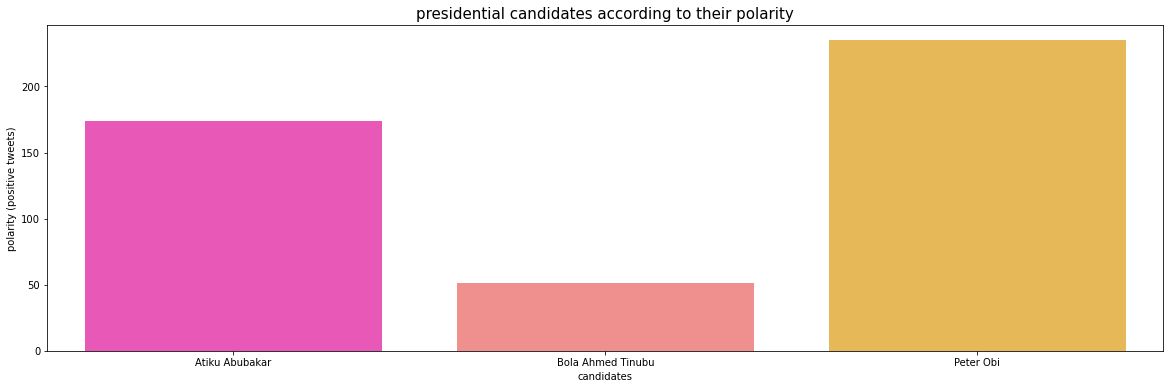

In [351]:
#plotting the results
plt.figure(figsize=(20,6))
sns.barplot(data = all_candidates, x= 'Candidate', y ='counts', palette = 'spring')

#setting the properties for the chart
plt.title('presidential candidates according to their polarity', fontsize = 15 ) 
plt.xlabel('candidates')
plt.ylabel('polarity (positive tweets)')

#saving the chart
plt.show()

In [352]:
#saving the dataframe to csv
df_result1.to_csv('sentiment.csv')